<a href="https://colab.research.google.com/github/clovermeyer/MachineLearning/blob/main/CloverMeyer__FinalMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clover Meyer


# 1. Load Dataset



### CSV file loaded in, first 5 rows

*   List item
*   List item

displayed, basic information and summary statstics

##### Create a copy of the dataset that replaces -1 values in numerical columns with NaN before generating summary statistics in order to avoid errors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file = '/content/drive/MyDrive/Colab_Notebooks/adoption1.csv'

import pandas as pd
import numpy as np # Imports numpy for NaN

data = pd.read_csv(file)

print("First 5 rows of the DataFrame:")
display(data.head())

print("\nBasic dataset information:")
data.info()

# Creates a copy of the DataFrame to replace all -1 values
cleaned_data = data.copy()

# Replaces -1 with NaN in numerical columns
numerical_cols = ['age_years', 'adopter_age'] # Identifies numerical columns from data.info() and data.describe()
for col in numerical_cols:
    if col in cleaned_data.columns:
        cleaned_data[col] = cleaned_data[col].replace(-1, np.nan)

print("\nSummary statistics (ignoring -1 values in numerical columns):")
display(cleaned_data.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows of the DataFrame:


,pet_ID,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets\
0,P0001,Sandra,Dog,Yorkshire Terrier,2,Female,White,10/10/24,True,3/11/25,A0001,Megan Rogers,56,Mcgeestad,1\
1,P0002,Brian,Cat,Tonkinese,1,Female,Golden,9/9/23,True,2/10/24,A0002,Jonathan Hawkins,18,Geneshire,2\
2,P0003,Timothy,Bird,Amazon Parrot,4,Male,Spotted,10/3/23,False,10/17/23,NaN,NaN,-1,NaN,0\
3,P0004,Karl,Dog,German Shepherd,1,Female,White,7/28/24,True,8/12/24,A0004,Natalie Rivera,51,North Richard,3\
4,P0005,Sarah,Rabbit,Dutch,1,Female,Spotted,2/21/24,False,2/26/24,NaN,NaN,-1,NaN,0\



Basic dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   pet_ID                  200 non-null    object
 1   pet_name                200 non-null    object
 2   species                 200 non-null    object
 3   breed                   200 non-null    object
 4   age_years               200 non-null    int64 
 5   gender                  200 non-null    object
 6   color                   200 non-null    object
 7   arrival_date            200 non-null    object
 8   adopted                 200 non-null    bool  
 9   adoption_date           200 non-null    object
 10  adopter_id              118 non-null    object
 11  adopter_name            118 non-null    object
 12  adopter_age             200 non-null    int64 
 13  adopter_city            118 non-null    object
 14  adopter_previous_pets\  200 no

,age_years,adopter_age
count,200.000000,118.000000
mean,7.545000,47.864407
std,4.512181,17.763843
min,1.000000,18.000000
25%,4.000000,30.250000
50%,7.000000,48.000000
75%,12.000000,63.000000
max,15.000000,75.000000


# 2. Preliminary Data Analysis

##### 2 bar charts

*   **Adoption Counts by Species:** displays that *cats, hamsters,* and *dogs* each account for over 20% of adoptions, with *birds* and *rabbits* making up the remainding percentages
*   **Adoption Counts by Gender:** displays that adoption rates are quite similar between male and female, both genders hovering just below 60%.


/tmp/ipython-input-889129117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='percentage', data=species_percentages, palette='viridis')


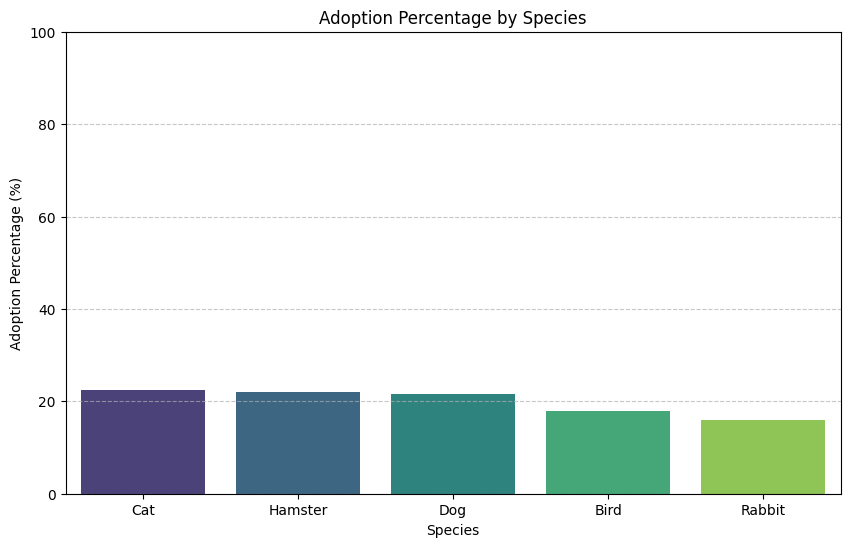

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculates total adoptions
total_adoptions = data['species'].value_counts().sum()

# Calculates adoption percentages by species
species_percentages = (data['species'].value_counts() / total_adoptions * 100).reset_index()
species_percentages.columns = ['species', 'percentage']

plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='percentage', data=species_percentages, palette='viridis')
plt.title('Adoption Percentage by Species')
plt.xlabel('Species')
plt.ylabel('Adoption Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100) # Sets y-axis limit from 0 to 100 for percentage
plt.show()

/tmp/ipython-input-1460878318.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='adoption_rate', data=gender_adoption_rates, palette='magma')


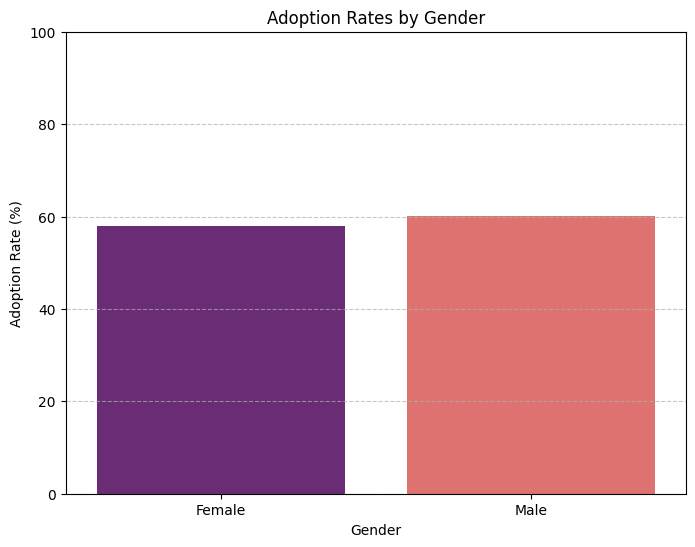

In [ ]:
# Bar chart for adoption rates by gender
gender_adoption_rates = data.groupby('gender')['adopted'].mean() * 100
gender_adoption_rates = gender_adoption_rates.reset_index()
gender_adoption_rates.columns = ['gender', 'adoption_rate']

plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='adoption_rate', data=gender_adoption_rates, palette='magma')
plt.title('Adoption Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Adoption Rate (%)')
plt.ylim(0, 100) # Set y-axis limit from 0 to 100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Dependent & Independent Variables



### Independent Variables (IVs):
*   **age_years**: The age of the pet in years.
*   **species**: The type of animal (*Cat*, Dog, Bird, Hamster, Rabbit).
*   **gender**: The biological sex of the pet (Male/Female).
*   **color**: The primary color of the pet.
*   **breed**: The breed of the pet.

### Dependent Variable (DV):
*   **adopted**: A binary outcome indicating whether the pet was adopted (True/False).

### Influence Predictions:
*   **Age**: Younger pets are often considered move desirable, especially for families with children. I believe yougner animals are more likely to be adopted than older animals.
*   **Species**: Dogs and cats may have a higher adoption rate because of their popularity.
*   **Gender**: Adoption rates might vary slightly between male and female pets, but I don't believe there will be a wide gap.
*   **Color**: Due to superstitons such as black cats being bad luck, I believe that lighter/more colorful animals will be slightly more likely to be adopted than black animals.
*   **Breed**: Purebreds or breeds perceived as "desirable" may be adopted faster, while less common or mixed breeds could take longer.

# 4. Data Preprocessing


Before training the models, the dataset is preprocessed by selecting relevant features, applying one-hot encoding to categorical variables, and splitting the data into training and testing sets. This ensures that both models receive numeric inputs and can be evaluated fairly.

'age_years', 'species', 'gender', 'color', and 'breed' were selected as features, and 'adopted' was the target. Split the preprocessed data into training and testing sets (80/20 ratio) and standardize the 'age_years' feature using `StandardScaler`.

## Features and Target

Select the specified features ('age_years', 'species', 'gender', 'color', 'breed') and the target variable ('adopted') from the `cleaned_data` DataFrame.

 `X` (features)
 `y` (target).



In [ ]:
features = ['age_years', 'species', 'gender', 'color', 'breed']
X = cleaned_data[features]
y = cleaned_data['adopted']

print("Shape of features (X):", X.shape)
print("First 5 rows of features (X):")
display(X.head())

print("Shape of target (y):", y.shape)
print("First 5 values of target (y):")
display(y.head())

Shape of features (X): (200, 5)
First 5 rows of features (X):


,age_years,species,gender,color,breed
0,2,Dog,Female,White,Yorkshire Terrier
1,1,Cat,Female,Golden,Tonkinese
2,4,Bird,Male,Spotted,Amazon Parrot
3,1,Dog,Female,White,German Shepherd
4,1,Rabbit,Female,Spotted,Dutch


Shape of target (y): (200,)
First 5 values of target (y):


,adopted
0,True
1,True
2,False
3,True
4,False


Now that features and the target have been selected, missing values need to be input in the 'age_years' column of the features DataFrame `X` with its mean. *This is crucial for handling missing data before further preprocessing steps.*



In [ ]:
X['age_years'] = X['age_years'].fillna(X['age_years'].mean())

print("Missing values in 'age_years' after imputation:")
print(X['age_years'].isnull().sum())
print("First 5 rows of features (X) after imputation:")
display(X.head())

/tmp/ipython-input-2015392955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_years'] = X['age_years'].fillna(X['age_years'].mean())


Missing values in 'age_years' after imputation:
0
First 5 rows of features (X) after imputation:


,age_years,species,gender,color,breed
0,2,Dog,Female,White,Yorkshire Terrier
1,1,Cat,Female,Golden,Tonkinese
2,4,Bird,Male,Spotted,Amazon Parrot
3,1,Dog,Female,White,German Shepherd
4,1,Rabbit,Female,Spotted,Dutch


The previous code block generated a `SettingWithCopyWarning` because `X` might have been a view of `cleaned_data`. To ensure modifications are made directly to `X` and avoid the warning, `X` should be explicitly created as a copy of the selected features. After that, the missing values in 'age_years' can be imputed.



In [ ]:
X = cleaned_data[features].copy()
X['age_years'] = X['age_years'].fillna(X['age_years'].mean())

print("Missing values in 'age_years' after imputation:")
print(X['age_years'].isnull().sum())
print("First 5 rows of features (X) after imputation:")
display(X.head())

Missing values in 'age_years' after imputation:
0
First 5 rows of features (X) after imputation:


,age_years,species,gender,color,breed
0,2,Dog,Female,White,Yorkshire Terrier
1,1,Cat,Female,Golden,Tonkinese
2,4,Bird,Male,Spotted,Amazon Parrot
3,1,Dog,Female,White,German Shepherd
4,1,Rabbit,Female,Spotted,Dutch


Next step is to apply one-hot encoding to the categorical features ('species', 'gender', 'color', 'breed') in the `X` DataFrame. This will convert them into a numerical format suitable for machine learning models.



In [ ]:
categorical_features = ['species', 'gender', 'color', 'breed']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print("Shape of features (X) after one-hot encoding:", X.shape)
print("First 5 rows of features (X) after one-hot encoding:")
display(X.head())

Shape of features (X) after one-hot encoding: (200, 69)
First 5 rows of features (X) after one-hot encoding:


,age_years,species_Cat,species_Dog,species_Hamster,species_Rabbit,gender_Male,color_Brown,color_Golden,color_Grey,color_Mixed,...,breed_Shih Tzu,breed_Siamese,breed_Siberian Husky,breed_Silver Marten,breed_Sphynx,breed_Syrian,breed_Teddy Bear Hamster,breed_Tonkinese,breed_Winter White,breed_Yorkshire Terrier
0,2,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,4,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Next step is to split the data into training and testing sets to prepare for model training and evaluation. This will use an 80/20 ratio.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 69)
Shape of X_test: (40, 69)
Shape of y_train: (160,)
Shape of y_test: (40,)


The 'age_years' feature needs to be standardized using `StandardScaler` to ensure it has a mean of 0 and a standard deviation of 1. *This step is important for many machine learning algorithms that are sensitive to feature scaling.*



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fits the scaler on the training data and transforms both training and test data
X_train['age_years'] = scaler.fit_transform(X_train[['age_years']])
X_test['age_years'] = scaler.transform(X_test[['age_years']])

print("Mean of 'age_years' in X_train after scaling:", X_train['age_years'].mean())
print("Standard deviation of 'age_years' in X_train after scaling:", X_train['age_years'].std())
print("First 5 rows of X_train after scaling 'age_years':")
display(X_train.head())

Mean of 'age_years' in X_train after scaling: 7.771561172376095e-17
Standard deviation of 'age_years' in X_train after scaling: 1.0031397251510377
First 5 rows of X_train after scaling 'age_years':


,age_years,species_Cat,species_Dog,species_Hamster,species_Rabbit,gender_Male,color_Brown,color_Golden,color_Grey,color_Mixed,...,breed_Shih Tzu,breed_Siamese,breed_Siberian Husky,breed_Silver Marten,breed_Sphynx,breed_Syrian,breed_Teddy Bear Hamster,breed_Tonkinese,breed_Winter White,breed_Yorkshire Terrier
79,-0.517290,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
197,-0.517290,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38,1.744086,False,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
24,-0.517290,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122,0.387261,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Preprocessing Steps Summary

The following preprocessing steps were performed on the `cleaned_data` DataFrame:

1.  **Feature and Target Selection:**
    *   Features (`X`) were selected: `'age_years'`, `'species'`, `'gender'`, `'color'`, and `'breed'`.
    *   Target variable (`y`) was selected: `'adopted'`.
    *   Initial `X` shape: (200, 5)
    *   Initial `y` shape: (200,)

2.  **Missing Value Imputation:**
    *   Missing values in the `'age_years'` column were imputed with the mean of the column.
    *   After imputation, there were 0 missing values in `'age_years'`.

3.  **One-Hot Encoding:**
    *   Categorical features (`'species'`, `'gender'`, `'color'`, `'breed'`) were one-hot encoded using `pd.get_dummies`.
    *   The `drop_first=True` argument was used to avoid multicollinearity.
    *   `X` shape after one-hot encoding: (200, 69)

4.  **Data Splitting:**
    *   The preprocessed data was split into training and testing sets using `train_test_split` with an 80/20 ratio and `random_state=42`.
    *   `X_train` shape: (160, 69)
    *   `X_test` shape: (40, 69)
    *   `y_train` shape: (160,)
    *   `y_test` shape: (40,)

5.  **Feature Standardization:**
    *   The `'age_years'` feature in both `X_train` and `X_test` was standardized using `StandardScaler`.
    *   The scaler was `fit_transform` on `X_train['age_years']` and `transform` on `X_test['age_years']`.
    *   After scaling, `X_train['age_years']` has a mean close to 0 and a standard deviation close to 1.

# 5. Model Training and Evaluation

## **Logistic Regression**


**Description of the algorithm:** Logistic Regression is a statistical model used for binary classification tasks. It models the probability of a binary outcome (e.g., adopted or not adopted) based on one or more independent variables.


**Math background on how it works:**
Turns a normal line equation into a Sigmoid function that turns any input into a probability (0 to 1). It predicts if something is Yes/No (1 or 0) by taking a weighted sum of the data, plugging it into the sigmoid function, and then checking if the result is above a certain threshold (like 0.5) as the deciding factor.


**Strengths**
* *Efficiency:* It is computationally efficient and suitable for large datasets.
*   *Strong Baseline Model:* Serves as a strong baseline for classification problems because it is straightforward in nature.
* *Outputs Probabilities:* Provides probabilistic outputs, which can be useful for ranking predictions or for cases where certainty of prediction is important.

**Weaknesses**

* *Limited Complexity:* May not perform well on complex problems where decision boundaries are highly non-linear, as it creates a linear decision boundary.
* *Binary Outcomes Only:* Fundamentally designed for binary classification.


**Why was this chosen:** The target variable adopted is binary (True/False), making Logistic Regression a natural and appropriate choice. It is also straightforward and efficent algorithm, and therefore serves as an excellent baseline model. It helps to quicklt establish a performance benchmark.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Re-loads data and creates cleaned_data DataFrame
file = '/content/drive/MyDrive/Colab_Notebooks/adoption1.csv'
data = pd.read_csv(file)
cleaned_data = data.copy()
numerical_cols = ['age_years', 'adopter_age']
for col in numerical_cols:
    if col in cleaned_data.columns:
        cleaned_data[col] = cleaned_data[col].replace(-1, np.nan)

# --- Re-defines X and y based on previous preprocessing steps ---

# Selects Features and Target
features = ['age_years', 'species', 'gender', 'color', 'breed']
y = cleaned_data['adopted']

# Imputes missing values for 'age_years'
X = cleaned_data[features].copy()
X['age_years'] = X['age_years'].fillna(X['age_years'].mean())

# One-Hot Encoding
categorical_features = ['species', 'gender', 'color', 'breed']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# --- Train-test split and scaling ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train['age_years'] = scaler.fit_transform(X_train[['age_years']])
X_test['age_years'] = scaler.transform(X_test[['age_years']])

# Initializes the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets

# Trains the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Logistic Regression model trained successfully.


### Evaluate Model Accuracy

After training the model, the performance needs to be evaluated its performance.

In [ ]:
from sklearn.metrics import accuracy_score

# Makes predictions on the test set
y_pred = model.predict(X_test)

# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.5250


###Confusion Matrix


A confusion matrix provides a more detailed view of the model's performance, showing the counts of true positive, true negative, false positive, and false negative predictions. This helps in understanding the types of errors the model is making.

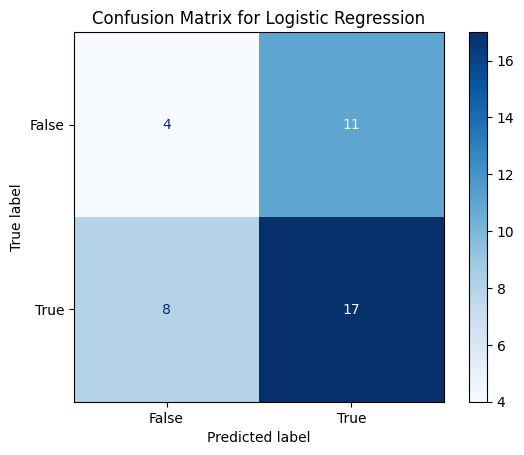

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generates the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displays the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## **k-Nearest Neighbors**


**Description of the algorithm:** The k-Nearest Neighbors (KNN) algorithm is a non-parametric, lazy learning algorithm used for both classification and regression tasks. It does not build a general model during the training phase, instead, it memorizes the entire training dataset. During the prediction phase, it performs computations to classify a new data point.


**Math background on how it works:** KNN finds the "closest" \(k\) data points (neighbors) to a new point using a distance metric, like straight-line Euclidean distance, and then predicting the new point's class by majority vote for classification or average for regression among those neighbors.


**Strengths**
* *Simple and Intuitive:* Easy to understand and implement, especially for beginners in machine learning.
*  *No Training Phase (Lazy Learner):* The "training" involves simply storing the dataset, making it very fast during the learning process.

**Weaknesses**

* *Sensitive to the Value of k:* The choice of k has a significant impact on performance. An optimal k is often found through cross-validation.
* *Storage Requirements:* Needs to store the entire training dataset in memory, which can be problematic for very large datasets.


**Why this was chosen:** k-Nearest Neighbors was chosen as a second model for this pet adoption prediction problem to provide a comparative perspective against Logistic Regression  because it classifies based on local proximity, which is fundamentally different from Logistic Regression's global linear decision. Also, since the data was already standardized during preprocessing, KNN leverages this, as it is sensitive to feature scaling. This ensures that 'age_years' does not unfairly dominate distance calculations.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initializes the KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Trains the KNN model
knn_model.fit(X_train, y_train)

print("k-Nearest Neighbors model trained successfully with k=5.")

k-Nearest Neighbors model trained successfully with k=5.


### Evaluate KNN Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Makes predictions on the test set using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Calculates the accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of the k-Nearest Neighbors model: {accuracy_knn:.4f}")

Accuracy of the k-Nearest Neighbors model: 0.4500


### Display KNN Confusion Matrix

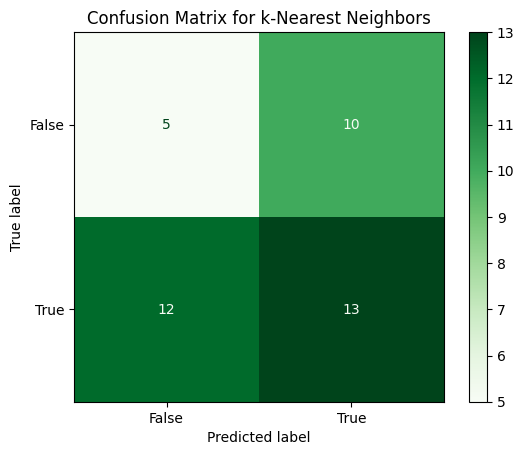

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generates the confusion matrix for k-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Displays the confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix for k-Nearest Neighbors')
plt.show()

#6. Comparison and Conclusion



*   Logistic Regression Accuracy: 0.5250
*   k-Nearest Neighbors (k=5) Accuracy: 0.4500



The Logistic Regression model achieved a slightly higher accuracy of 52.50% compared to the k-Nearest Neighbors model's 45.00%. Both accuracies are relatively low, which suggests that using the selected indepent vairables ('age_years', 'species', 'gender', 'color', and 'breed') is challenging with these models.



Data Challenges:
* Missing Values: The presence of -1 values representing missing data in numerical columns like age_years and adopter_age required careful handling. Identifying these values and converting them to NaN before imputation was a necessary but minor challenge.
* Categorical Feature Explosion: The dataset contained several categorical features (species, gender, color, breed). While color and breed were highly cardinal, applying one-hot encoding significantly increased the dimensionality of the feature space (from 5 features to 69).

Model Performance and Insights:

* Low Accuracy: Both Logistic Regression (52.50%) and k-Nearest Neighbors (45.00%) achieved relatively low accuracy scores. This indicates that predicting pet adoption based solely on the selected independent variables (age_years, species, gender, color, breed) is challenging with these models and perhaps this dataset.
* Limited Predictive Power: The models struggled to generalize, which suggests that the features chosen cannot capture enough variance to accurately predict adoption outcomes. Other variables like pet personality, health status, and adopter history might have been more influential.

In conclusion, this project successfully demonstrated data loading, cleaning, preprocessing, and the application of two common classification algorithms. The primary difficulty stemmed from the models' limited predictive power on the chosen features, suggesting the complexity of pet adoption prediction and the need for more comprehensive data or advanced modeling techniques to solve these problems.


## 7. Evaluation of Project Difficulty

### Data Challenges:
One significant data challenge was the presence of -1 values in numerical columns (`age_years`, `adopter_age`), which required careful imputation (replacing them with `NaN` and then with the mean of the respective columns) to avoid skewing summary statistics and model training. The dataset, while relatively clean otherwise, led to a large number of features after one-hot encoding for categorical variables (`species`, `gender`, `color`, `breed`), which can increase model complexity and potentially lead to sparsity.

### Model Performance:
Both the Logistic Regression and k-Nearest Neighbors models exhibited relatively low accuracies (52.50% and 45.00% respectively). This indicates that the selected independent variables (`age_years`, `species`, `gender`, `color`, `breed`) might not be strong predictors for pet adoption with these specific models, or that the relationships are too complex for these linear/distance-based models to capture effectively. The low performance suggests the project faced challenges in identifying clear patterns for adoption with the given features, making prediction a difficult task.

### Insights Gained:

1.  **Feature Importance:** The low model accuracies suggest that other features not included in this analysis (e.g., historical adoption data, pet personality traits, adopter lifestyle, marketing efforts) might be more influential in predicting pet adoption.
2.  **Model Limitations:** Logistic Regression and k-NN are relatively simple models. More advanced models (e.g., tree-based methods like Random Forest or Gradient Boosting, or neural networks) might be able to uncover more complex relationships within the data, potentially leading to improved performance.
3.  **Data Quality Impact:** The initial data cleaning step for handling -1 values was crucial. However, the overall dataset size (200 entries) might also be a limiting factor for complex models.
4.  **Complexity of Prediction:** Predicting pet adoption is inherently complex, as it likely depends on a multitude of factors, many of which are qualitative or not easily quantifiable in the current dataset.

## 8. Suggestions for Future Work

Given low accuracy scores of the current models and moderate difficulty of this project, there a few ways others can help improve the prediction of pet adoption in the future:

1.  **Exploration of More Complex Models:**
    *   **Tree-based Models:** Algorithms like Decision Trees and Random Forests can capture non-linear relationships and interactions automatically.
    *   **Neural Networks:** For highly complex patterns, a simple neural network could be used, especially if more pet adoption data becomes available.

2.  **Feature Engineering:**
    *   **Adopter Information:** If more `adopter` information becomes available (e.g., `adopter_city`, `adopter_previous_pets`), engineer features from these to capture adopter characteristics.
    *   **Breed Grouping:** Group similar breeds to reduce the high granularity of the `breed` feature, which currently results in many sparse one-hot encoded columns.
    *   **Color Grouping:** Group similar colors or identify primary vs. secondary colors to simplify the `color` feature.

3.  **Data Collection:** The most impactful improvement will probably come from acquiring additional and more diverse data. This could include:
    *   Pet personality traits.
    *   Health status
    *   Larger dataset size to capture more varied scenarios.

By implementing these suggested, the pet adoption model can be significantly enhanced and more accurate.


## 9. Summary:

### Data Analysis Key Findings

*   **Independent and Dependent Variables Defined**: `age_years`, `species`, `gender`, `color`, and `breed` were clearly defined as independent variables, and were assumed to influence the binary dependent variable `adopted`.
*   **Model Performance was Low**: Both implemented models had relatively low accuracy scores: Logistic Regression achieved 52.50%, and k-Nearest Neighbors achieved 45.00%.
*   **Data Challenges Encountered**: The dataset presented challenges such as handling `-1` values for missing data and a significant increase in feature dimensionality (from 5 to 69 features) due to one-hot encoding highly cardinal categorical variables like `color` and `breed`.
*   **Feature Limitations and Dataset Size**: The low predictive power suggests that the selected features may not fully capture the complexity of pet adoption, or that the dataset size (200 entries) is insufficient for the models to learn robust patterns.
*   **Standard Preprocessing Applied**: Standard preprocessing steps were successfully executed, including imputation, one-hot encoding, train-test splitting, and feature scaling.

### Insights/Next Steps

*   **Enhance Feature Engineering and Data Collection**: Given the low model accuracies, focus on creating more impactful features and collecting more comprehensive data, such as pet personality traits, health status, and adopter demographics.
*   **Explore Advanced Models and Tuning**: To improve predictive performance,more sophisticated machine learning algorithms like tree-based models such as Random Forests and Decision Trees  which can handle complex, non-linear relationships, should be used.